This notebook implements feature extraction methods for the courtlistener dataset. It assumes that the following files are present:

- **cites.csv** : get ground-truth indegree as well as network features.
- **ops_meta.jsonl** : get metadata features (eg. court, date, precedent, *judges*, *statutes*)
- **ops_text.jsonl** : get text features.

In [23]:
import os
import ujson
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
%matplotlib inline

In [2]:
CLDIR = "/hg191/corpora/legaldata/"
REGRESSIONS_DATA_DIR = os.path.join (CLDIR, "regressions", "data")

## IDs

In [45]:
with open (os.path.join (CLDIR, "ops_meta.jsonl")) as fin, open (os.path.join (REGRESSIONS_DATA_DIR, "ids.dat"), "w") as fout:
    for line in fin:
        js = ujson.loads (line)
        fout.write ("{0}\n".format (js["id"]))

## Courts

In [3]:
with open (os.path.join (CLDIR, "ops_meta.jsonl")) as fin, open (os.path.join (REGRESSIONS_DATA_DIR, "courts.dat"), "w") as fout:
    fout.write ("id,court\n")
    for line in fin:
        js = ujson.loads (line)
        fout.write (",".join([str(js["id"]), js["court"]]) + "\n")

In [4]:
df = pd.read_csv (os.path.join (REGRESSIONS_DATA_DIR, "courts.dat"), sep=",")

## Citations

In [9]:
net = pd.read_csv (os.path.join (CLDIR, "cites.csv"), sep=",")
outdegree = Counter (net.citing_opinion_id.values)
indegree = Counter (net.cited_opinion_id.values)

In [14]:
print (len (outdegree))
print (len (indegree))

3032627
2030098


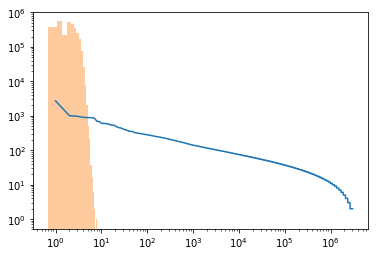

In [34]:
y = np.array([val+1 for _,val in sorted (outdegree.items(), key=lambda x:x[1], reverse=True)])
x = np.arange(1, len (y)+1)
plt.loglog (x,y)
sns.distplot (np.log(y), bins=20, kde=False)

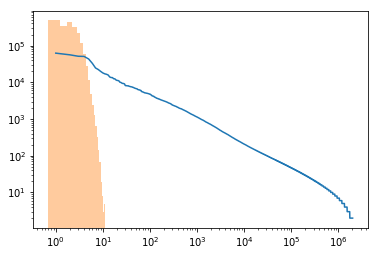

In [35]:
y = np.array([val+1 for _,val in sorted (indegree.items(), key=lambda x:x[1], reverse=True)])
x = np.arange(1, len (y)+1)
plt.loglog (x,y)
sns.distplot (np.log(y), bins=20, kde=False)

In [36]:
with open (os.path.join (REGRESSIONS_DATA_DIR, "outdegree.dat"), "w") as fout:
    fout.write ("id,outd\n")
    for key in outdegree:
        fout.write (",".join ([str (key), str (outdegree[key])]) + "\n")

In [37]:
with open (os.path.join (REGRESSIONS_DATA_DIR, "indegree.dat"), "w") as fout:
    fout.write ("id,ind\n")
    for key in outdegree:
        fout.write (",".join ([str (key), str (indegree[key])]) + "\n")

## Date

In [44]:
with open (os.path.join (CLDIR, "ops_meta.jsonl")) as fin, open (os.path.join (REGRESSIONS_DATA_DIR, "dates.dat"), "w") as fout:
    fout.write ("id,date\n")
    for line in fin:
        js = ujson.loads (line)
        fout.write(",".join([str(js["id"]), js["date_filed"]]) + "\n")

## Precedent Status

In [46]:
with open (os.path.join (CLDIR, "ops_meta.jsonl")) as fin, open (os.path.join (REGRESSIONS_DATA_DIR, "precedents.dat"), "w") as fout:
    fout.write ("id,precedent\n")
    for line in fin:
        js = ujson.loads (line)
        fout.write (",".join ([str(js["id"]), js["precedential_status"]]) + "\n")

## Judges

## Statutes

## Bag of Words